# MOSCOW REAL ESTATE PRICES
**_Doing to houses & apartments what we did to cars_**
### Data Science 410 BB
#### University of Washington Professional & Continuing Education
#### FINAL PROJECT
#### Leo Salemann, 3/10/18

# INTRODUCTION
_An introduction with a statement of the problem you are addressing and a summary of your conclusions.
Is there an introduction with a clear statement of the problem to be addressed? 10%_

What is our actual purpose?
- Identify key features (like aspiration, fuel-type, body-type).
- 

- Start with the Kaggle Data
- Leverage prior data cleanups via Azure ML Studio
- Apply techniques from the autos

Our dataset comes from a [Kaggle competition to predict real Moscow esate prices](https://www.kaggle.com/c/sberbank-russian-housing-market). I first encountered this data in a [team project](https://www.slideshare.net/LeoSalemann/predicting-moscow-real-estate-prices-with-azure-machine-learning) for [UW PCE Big Data Technologies - Introduciton to Data Engineering](https://www.pce.uw.edu/courses/introduction-to-data-engineering). We used [Microsoft Azure Machine Learning Studio](https://gallery.cortanaintelligence.com/Experiment/D-Hawks-Big-Data-Project-Leo-RevS) to look at multiple approaches to feature engineering, and try multiple machine learning models simultaneosly. For this project, we'll extract realestate data from Azure ML Studio, after cleaning but before any Azure ML modeling.  We'll then do our own feature analysis in Jupyter Notebook with R. Let's get started ...

# DATA EXPLORATION
_Discussion of your exploration of the dataset supported by charts and summary statistics. Examine several aspects of the dataset. Explain which aspects are important and why._

_Has the data been properly prepared in terms of cleaning, normalization, etc? Is this preparation consistent with the data exploration?_

_Given the data set and the stated problem, does the data exploration find enlightening relationships in the data? Is the exploration truly in-depth? Are the steps used and inferences drawn clearly explained? A few random histograms and scatter plots are not really good enough, the exploration needs to generate insight._

The [original kaggle datasets](https://www.kaggle.com/c/sberbank-russian-housing-market/data) consisted of two tables: Real Estate Transactions and Macro Economics. The Real Estate Transactions table includes price, timestamp, year built, property descriptors such as  square footage, number of floors, condition, etc. and neighborhood descriptors such as nearby transportation, industry, population demographics.  

**_Actually, I didn't use the Macro ecomic data_** The [original kaggle datasets](https://www.kaggle.com/c/sberbank-russian-housing-market/data) consisted of two tables: Real Estate Transactions and Macro Economics. The Real Estate Transactions table includes price, timestamp, year built, property descriptors such as  square footage, number of floors, condition, etc. and neighborhood descriptors such as nearby transportation, industry, population demographics.  The Macro Economics table includes gdb, commodity prices, USD/Ruble exchange rates, etc.

Azure ML Studio Summary
1. Start with the original 30,471 rows and 292 columns
1. Select 64 columns to work with.
1. Set a bunch of numeric data to floating point, integer, category
1. Clean missing data
1. Apply SQL Transofmation (see below)
1. Normalize non-categorical rows


Cleaning missing data

|Field                         |Set To   |Rows Affected|
|------------------------------|---------|-------------|
|build_year                    |1979     |13,605       |
|life_sq (living space, m$^2$) |30       | 6,383       |
|floor (level above ground)    |7        |   167       |
|num_room                      |2        | 9,572       |
|kitch_sq (kitchen space m$^2$)|6        | 9,572       |
|material                      |mode\*   | 9,672       |
|state                         |MICE\*\* |0            |
|full_sq (total m$^2$)         |mode\*   |0            |
|max_floor (highest, 0=ground) |0        | 9,571       |
|metro_min_walk                |median   |    25       |
|railroad_station_walk_km      |median   |    25       |
|railroad_station_walk_min     |median   |    25       |
|metro_km_walk                 |median   |    25       |




\* replace nulls with the mode of the non-null data

\*\* [Multivariate Imputation using Chaned Equations](https://docs.microsoft.com/en-us/azure/machine-learning/studio-module-reference/clean-missing-data)

In [ ]:
## PROBALBY SQIP THE SQL

## Load the data, have a quick look

real_estate = read.csv("https://drive.google.com/open?id=16NtcMRCVVZGszIvC4VikacdjuGqIsojQ")

In [25]:
real_estate = read.csv("D-Hawks Big Data Project Leo _RevS_cleaned.csv")

In [26]:
dim(real_estate)

[1] 30471    64

In [27]:
head(real_estate)

timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,⋯,prom_part_2000,office_count_2000,office_sqm_2000,prom_part_3000,office_count_3000,office_sqm_3000,prom_part_5000,office_count_5000,office_sqm_5000,price_doc
8/20/2011 12:00:00 AM,43,27,4,0,1,1979,2,6,3,⋯,15.97,9,188854,13.55,12,251554,13.31,29,807385,5850000
8/23/2011 12:00:00 AM,34,19,3,0,1,1979,2,6,2,⋯,19.25,4,165510,27.32,12,821986,27.47,66,2690465,6000000
8/27/2011 12:00:00 AM,43,29,2,0,1,1979,2,6,2,⋯,12.75,4,100200,26.46,8,110856,21.58,43,1478160,5700000
9/1/2011 12:00:00 AM,89,50,9,0,1,1979,2,6,3,⋯,5.73,2,11000,3.57,4,167000,3.89,8,244166,13100000
9/5/2011 12:00:00 AM,77,77,4,0,1,1979,2,6,3,⋯,5.02,149,1625130,8.62,305,3420907,10.92,689,8404624,16331452
9/6/2011 12:00:00 AM,67,46,14,0,1,1979,2,6,3,⋯,51.58,21,471290,39.99,54,1181009,25.79,253,4274339,9100000


In [28]:
str(real_estate)

'data.frame':	30471 obs. of  64 variables:
 $ timestamp                        : Factor w/ 1161 levels "10/10/2011 12:00:00 AM",..: 1011 1024 1034 1074 1146 1150 1156 1159 1067 1080 ...
 $ full_sq                          : int  43 34 43 89 77 67 25 44 42 36 ...
 $ life_sq                          : int  27 19 29 50 77 46 14 44 27 21 ...
 $ floor                            : int  4 3 2 9 4 14 10 5 5 9 ...
 $ max_floor                        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ material                         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ build_year                       : int  1979 1979 1979 1979 1979 1979 1979 1979 1979 1979 ...
 $ num_room                         : int  2 2 2 2 2 2 2 2 2 2 ...
 $ kitch_sq                         : int  6 6 6 6 6 6 6 6 6 6 ...
 $ state                            : int  3 2 2 3 3 3 2 2 3 3 ...
 $ product_type                     : Factor w/ 2 levels "Investment","OwnerOccupier": 1 1 1 1 1 1 1 1 1 1 ...
 $ sub_area                         : Factor w/ 

## _Date Time Pracice_

In [42]:
dtimes = c("2002-06-09 12:45:40 AM","2003-01-29 09:30:40 AM",
            "2002-09-04 16:45:40 AM","2002-11-13 20:00:40 AM",
            "2002-07-07 17:30:40 AM")
dtimes

[1] "2002-06-09 12:45:40" "2003-01-29 09:30:40" "2002-09-04 16:45:40"
[4] "2002-11-13 20:00:40" "2002-07-07 17:30:40"

In [71]:
dtimes = as.data.frame(c("6/9/2002 12:45:40 AM","1/29/2003 09:30:40 AM",
           "9/4/2002 16:45:40 AM","11/13/2002 20:00:40 AM",
           "7/7/2002 17:30:40 AM"))
colnames(dtimes) = c("timestamp")
dtimes

timestamp
6/9/2002 12:45:40 AM
1/29/2003 09:30:40 AM
9/4/2002 16:45:40 AM
11/13/2002 20:00:40 AM
7/7/2002 17:30:40 AM


In [72]:
dtimes[,1]

[1] 6/9/2002 12:45:40 AM   1/29/2003 09:30:40 AM  9/4/2002 16:45:40 AM  
[4] 11/13/2002 20:00:40 AM 7/7/2002 17:30:40 AM  
5 Levels: 11/13/2002 20:00:40 AM ... 9/4/2002 16:45:40 AM

In [73]:
dtimes$date = as.Date(dtimes[,1],format='%m/%d/%Y')
dtimes
str(dtimes)

timestamp,date
6/9/2002 12:45:40 AM,2002-06-09
1/29/2003 09:30:40 AM,2003-01-29
9/4/2002 16:45:40 AM,2002-09-04
11/13/2002 20:00:40 AM,2002-11-13
7/7/2002 17:30:40 AM,2002-07-07


'data.frame':	5 obs. of  2 variables:
 $ timestamp: Factor w/ 5 levels "11/13/2002 20:00:40 AM",..: 3 2 5 1 4
 $ date     : Date, format: "2002-06-09" "2003-01-29" ...


In [62]:
strsplit(dtimes,' ')

ERROR: Error in strsplit(dtimes, " "): non-character argument


In [56]:
dtparts = t(as.data.frame(strsplit(dtimes,' ')))
dtparts
dateparts = t(str)

ERROR: Error in strsplit(dtimes, " "): non-character argument


In [54]:
row.names(dtparts) = NULL
dtparts
str(dtparts)
dim(dtparts)

6/9/2002,12:45:40,AM
1/29/2003,09:30:40,AM
9/4/2002,16:45:40,AM
11/13/2002,20:00:40,AM
7/7/2002,17:30:40,AM


 chr [1:5, 1:3] "6/9/2002" "1/29/2003" "9/4/2002" "11/13/2002" ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : NULL


[1] 5 3

In [47]:
require(chron)
thetimes = chron(dates=dtparts[,1],times=dtparts[,2],
                  format=c('y-m-d','h:m:s'))
thetimes

Loading required package: chron


[1] (02-06-09 12:45:40) (03-01-29 09:30:40) (02-09-04 16:45:40)
[4] (02-11-13 20:00:40) (02-07-07 17:30:40)

## Add Date to supplement timestamp

In [ ]:
dtimes$date = as.Date(dtimes[,1],format='%m/%d/%Y')

## Add Price Per Square Meter & Parse the date

In [76]:
real_estate$price_sqm = real_estate$price_doc/real_estate$full_sq
real_estate$date = as.Date(real_estate$timestamp,format='%m/%d/%Y')
head(real_estate,3)
str(real_estate)

timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,⋯,prom_part_3000,office_count_3000,office_sqm_3000,prom_part_5000,office_count_5000,office_sqm_5000,price_doc,price_sqm,log.price_sqm,date
8/20/2011 12:00:00 AM,43,27,4,0,1,1979,2,6,3,⋯,13.55,12,251554,13.31,29,807385,5850000,136046.5,11.82075,2011-08-20
8/23/2011 12:00:00 AM,34,19,3,0,1,1979,2,6,2,⋯,27.32,12,821986,27.47,66,2690465,6000000,176470.6,12.08091,2011-08-23
8/27/2011 12:00:00 AM,43,29,2,0,1,1979,2,6,2,⋯,26.46,8,110856,21.58,43,1478160,5700000,132558.1,11.79478,2011-08-27


'data.frame':	30471 obs. of  67 variables:
 $ timestamp                        : Factor w/ 1161 levels "10/10/2011 12:00:00 AM",..: 1011 1024 1034 1074 1146 1150 1156 1159 1067 1080 ...
 $ full_sq                          : int  43 34 43 89 77 67 25 44 42 36 ...
 $ life_sq                          : int  27 19 29 50 77 46 14 44 27 21 ...
 $ floor                            : int  4 3 2 9 4 14 10 5 5 9 ...
 $ max_floor                        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ material                         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ build_year                       : int  1979 1979 1979 1979 1979 1979 1979 1979 1979 1979 ...
 $ num_room                         : int  2 2 2 2 2 2 2 2 2 2 ...
 $ kitch_sq                         : int  6 6 6 6 6 6 6 6 6 6 ...
 $ state                            : int  3 2 2 3 3 3 2 2 3 3 ...
 $ product_type                     : Factor w/ 2 levels "Investment","OwnerOccupier": 1 1 1 1 1 1 1 1 1 1 ...
 $ sub_area                         : Factor w/ 

## Density plot of price

Warning message:
“Removed 2 rows containing non-finite values (stat_density).”

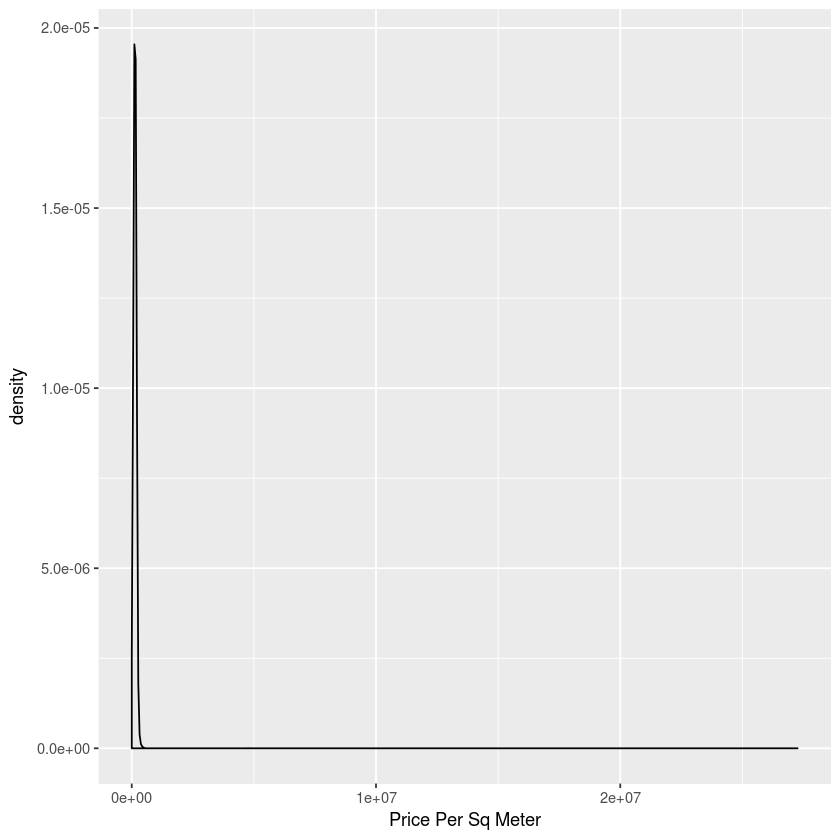

In [32]:
require(ggplot2)
ggplot(real_estate, aes(price_sqm)) + geom_density() + xlab('Price Per Sq Meter')

timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,⋯,office_sqm_2000,prom_part_3000,office_count_3000,office_sqm_3000,prom_part_5000,office_count_5000,office_sqm_5000,price_doc,price_sqm,log.price_sqm
8/20/2011 12:00:00 AM,43,27,4,0,1,1979,2,6,3,⋯,188854,13.55,12,251554,13.31,29,807385,5850000,136046.5,11.82075
8/23/2011 12:00:00 AM,34,19,3,0,1,1979,2,6,2,⋯,165510,27.32,12,821986,27.47,66,2690465,6000000,176470.6,12.08091
8/27/2011 12:00:00 AM,43,29,2,0,1,1979,2,6,2,⋯,100200,26.46,8,110856,21.58,43,1478160,5700000,132558.1,11.79478
9/1/2011 12:00:00 AM,89,50,9,0,1,1979,2,6,3,⋯,11000,3.57,4,167000,3.89,8,244166,13100000,147191.0,11.89949
9/5/2011 12:00:00 AM,77,77,4,0,1,1979,2,6,3,⋯,1625130,8.62,305,3420907,10.92,689,8404624,16331452,212096.8,12.26480
9/6/2011 12:00:00 AM,67,46,14,0,1,1979,2,6,3,⋯,471290,39.99,54,1181009,25.79,253,4274339,9100000,135820.9,11.81909


Warning message:
“Removed 2 rows containing non-finite values (stat_density).”

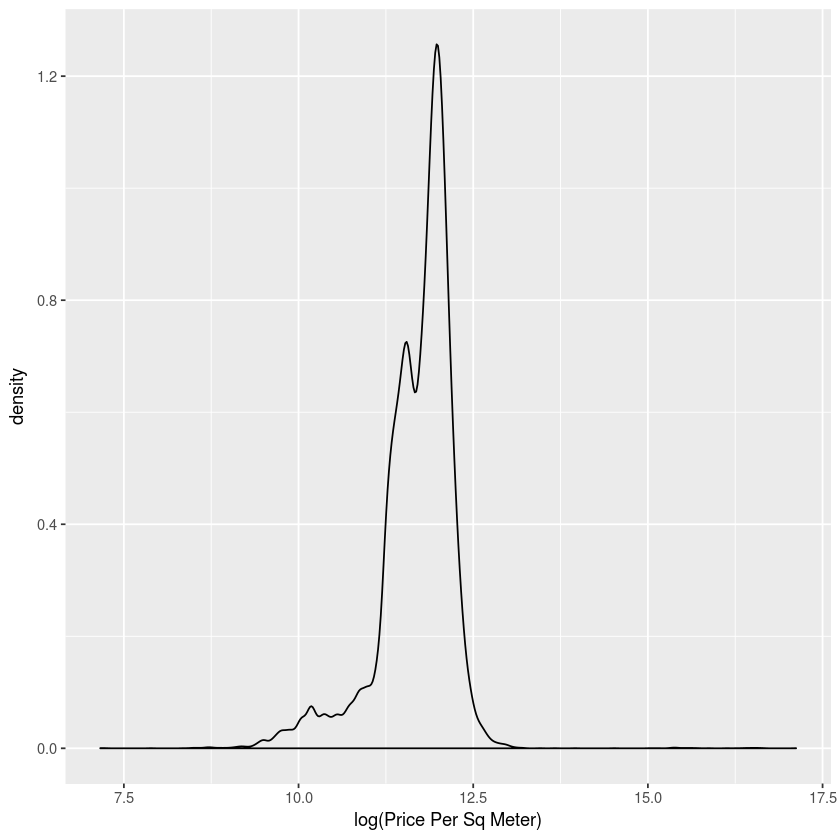

In [34]:
real_estate$log.price_sqm = log(real_estate$price_sqm)
head(real_estate)
ggplot(real_estate, aes(log.price_sqm)) + geom_density() + 
xlab('log(Price Per Sq Meter)')

Warning message:
“Removed 2 rows containing non-finite values (stat_density).”Warning message:
“Removed 2 rows containing non-finite values (stat_density).”

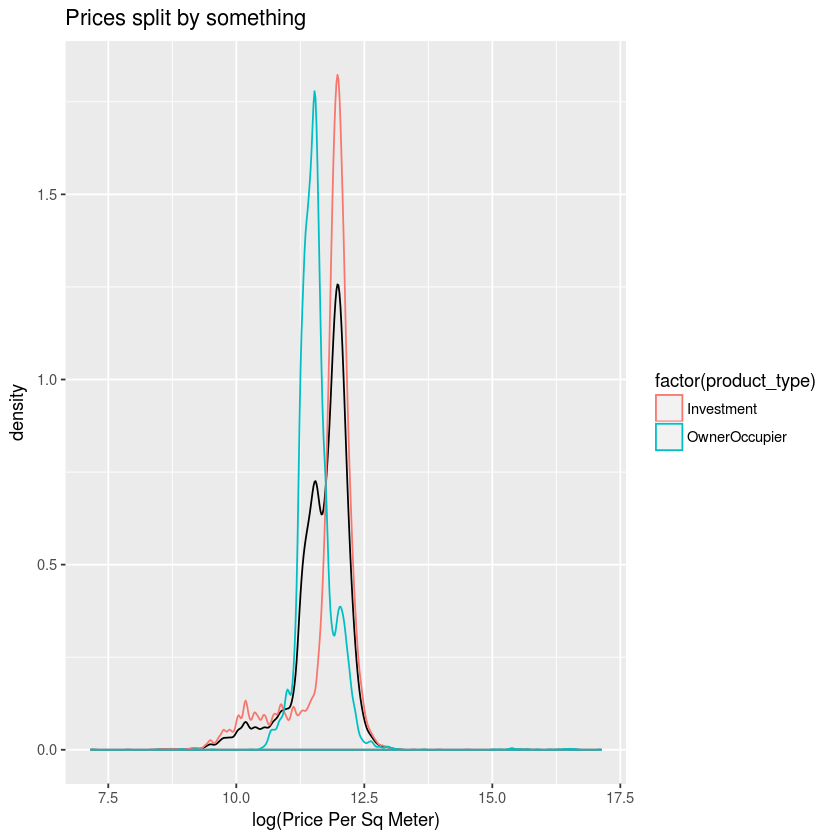

In [36]:
ggplot(real_estate, aes(log.price_sqm)) + geom_density() + xlab('log(Price Per Sq Meter)') + 
geom_density(aes(color = factor(product_type))) + 
ggtitle('Prices split by something')

Warning message:
“Removed 2 rows containing non-finite values (stat_density2d).”

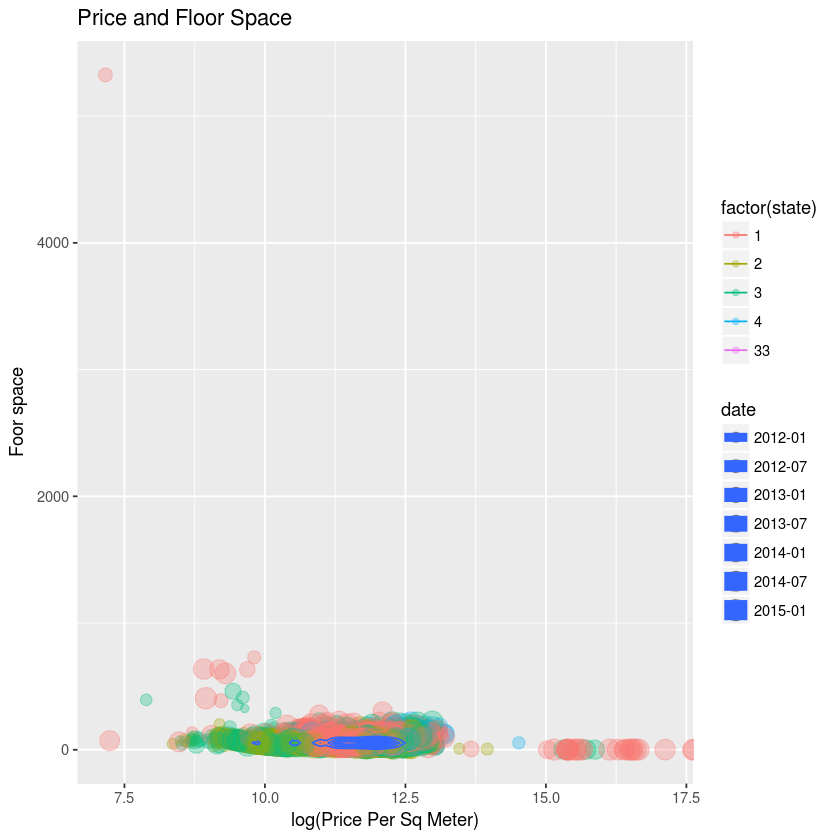

In [77]:
ggplot(real_estate, aes(x = log.price_sqm, y = full_sq,))+ 
geom_point(aes(color = factor(state),
               size = date),
               alpha = 0.3) + 
geom_density2d() +
xlab('log(Price Per Sq Meter)') + 
ylab('Foor space') + 
ggtitle('Price and Floor Space')

Warning message:
“Removed 44 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 42 rows containing missing values (geom_point).”

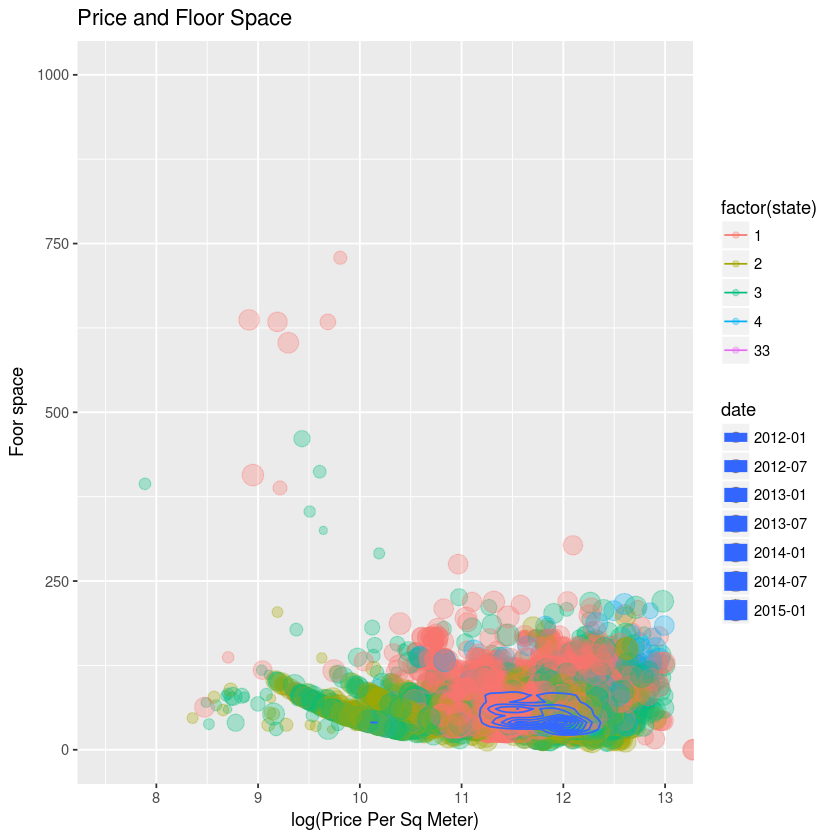

In [78]:
ggplot(real_estate, aes(x = log.price_sqm, y = full_sq,))+ 
geom_point(aes(color = factor(state),
               size = date),
               alpha = 0.3) + 
xlim(c(7.5, 13.0)) + ylim(c(0, 1000)) + 
geom_density2d() +
xlab('log(Price Per Sq Meter)') + 
ylab('Foor space') + 
ggtitle('Price and Floor Space')

Warning message:
“Removed 44 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 42 rows containing missing values (geom_point).”

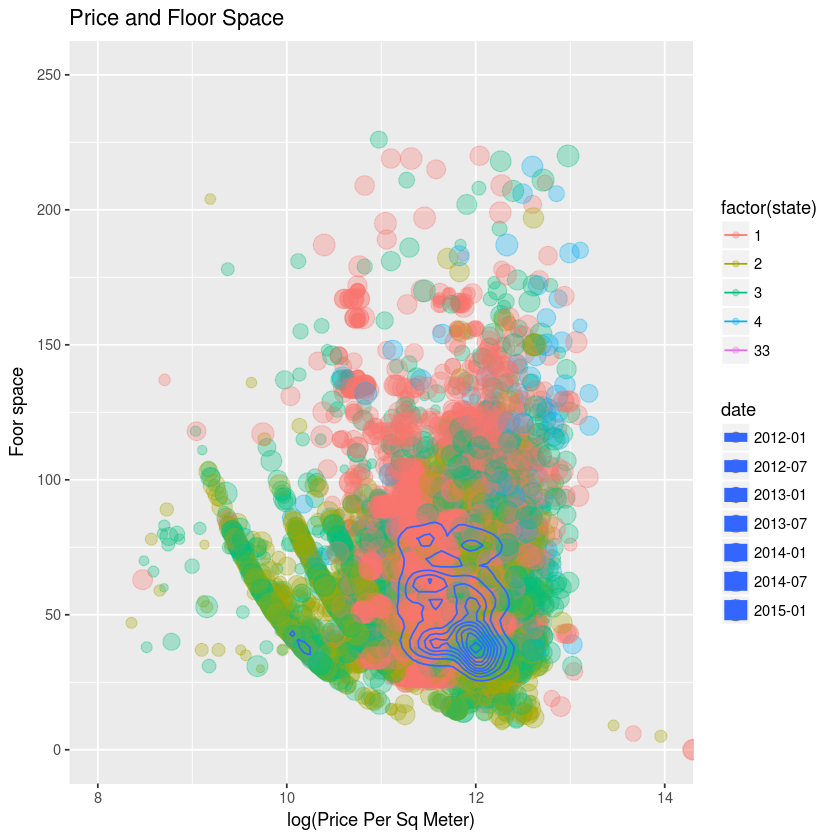

In [79]:
ggplot(real_estate, aes(x = log.price_sqm, y = full_sq,))+ 
geom_point(aes(color = factor(state),
               size = date),
               alpha = 0.3) + 
xlim(c(8.0, 14.0)) + ylim(c(0, 250)) + 
geom_density2d() +
xlab('log(Price Per Sq Meter)') + 
ylab('Foor space') + 
ggtitle('Price and Floor Space')

In [ ]:
## Segment by Time & type (do some forecasting after all?)

# CHOICE OF MODELS
Explain your choice of models and discuss the model results using text, charts and tables. Models should be within the scope of the course. You may use any combination of R, Python and Azure Machine Learning for your analysis.

Have appropriate steps been taken to improve the model? For example, feature engineering, feature selection, dealing with case imbalances, dealing  with data problems?

## Use these

- **HW01** scatterplot matrices, density plot, density2d

- **HW02** faceted histograms, multiple density plots

- **HW05** Bootstrapping, difference of means (similar to HW4, but easier & better)

- **HW07** Regression initial way to find the vars

## Drop These

- **HW03** monty hall simulation (_skip?_)

## UNIDEN

- **HW04** normalizing, historgrams, t-test, ANOVA, Tukey HSD

- **HW06** Bayesian. very similar results to HW05, a bit harder to do.

- **HW08** Time Series, Dairy, Forecasting

Basic Goals
- Wrap our Heads around pricing behavior
- Figure out which features might be important
- Tease things apart a'la autos, fuel, apsiration, body

## Normalize the Numeric Fields

In [80]:
str(real_estate)

'data.frame':	30471 obs. of  67 variables:
 $ timestamp                        : Factor w/ 1161 levels "10/10/2011 12:00:00 AM",..: 1011 1024 1034 1074 1146 1150 1156 1159 1067 1080 ...
 $ full_sq                          : int  43 34 43 89 77 67 25 44 42 36 ...
 $ life_sq                          : int  27 19 29 50 77 46 14 44 27 21 ...
 $ floor                            : int  4 3 2 9 4 14 10 5 5 9 ...
 $ max_floor                        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ material                         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ build_year                       : int  1979 1979 1979 1979 1979 1979 1979 1979 1979 1979 ...
 $ num_room                         : int  2 2 2 2 2 2 2 2 2 2 ...
 $ kitch_sq                         : int  6 6 6 6 6 6 6 6 6 6 ...
 $ state                            : int  3 2 2 3 3 3 2 2 3 3 ...
 $ product_type                     : Factor w/ 2 levels "Investment","OwnerOccupier": 1 1 1 1 1 1 1 1 1 1 ...
 $ sub_area                         : Factor w/ 

In [81]:
fields.numeric = c(
    'build_year',
    'floor',
    'full_sq',
    'healthcare_centers_raion',
    'hospital_beds_raion',
    'kitch_sq',
    'life_sq',
    'material',
    'max_floor',
    'num_room',
    'office_count_1000',
    'office_count_1500',
    'office_count_2000',
    'office_count_3000',
    'office_count_500',
    'office_count_5000',
    'office_raion',
    'office_sqm_1000',
    'office_sqm_1500',
    'office_sqm_2000',
    'office_sqm_3000',
    'office_sqm_500',
    'office_sqm_5000',
    'price_doc',
    'state',
    'big_road1_km',
    'big_road2_km',
    'bulvar_ring_km',
    'bus_terminal_avto_km',
    'cemetery_km',
    'detention_facility_km',
    'hospice_morgue_km',
    'log.price_sqm',
    'metro_km_avto',
    'metro_km_walk',
    'metro_min_avto',
    'metro_min_walk',
    'mkad_km',
    'office_km',
    'oil_chemistry_km',
    'price_sqm',
    'prom_part_1000',
    'prom_part_1500',
    'prom_part_2000',
    'prom_part_3000',
    'prom_part_500',
    'prom_part_5000',
    'public_healthcare_km',  
    'public_transport_station_km',
    'public_transport_station_min_walk',
    'railroad_km',
    'railroad_station_avto_km',
    'railroad_station_avto_min',
    'railroad_station_walk_km',
    'railroad_station_walk_min',
    'sadovoe_km',
    'ttk_km',
    'zd_vokzaly_avto_km'
)

In [82]:
fields.date = c('date')

In [83]:
fields.other = c(
    'big_road1_1line',
    'detention_facility_raion',
    'oil_chemistry_raion',
    'product_type',
    'railroad_1line',
    'railroad_terminal_raion',
    'sub_area',
    'timestamp'
)

In [91]:
real_estate = na.omit(real_estate)
real_estate.scaled = real_estate
real_estate.scaled[, fields.numeric] = 
    lapply(real_estate[, fields.numeric],scale)
# real_estate.scaled = na.omit(real_estate.scaled)
head(real_estate.scaled, 3)
head(real_estate, 3)

timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,⋯,prom_part_3000,office_count_3000,office_sqm_3000,prom_part_5000,office_count_5000,office_sqm_5000,price_doc,price_sqm,log.price_sqm,date
8/20/2011 12:00:00 AM,-0.2270362,-0.3080286,-0.6483442,-1.078503,-0.473224,-0.007666462,0.05181626,-0.02516682,0.9586941,⋯,0.07158248,-0.3461783,-0.44852213,0.2630784,-0.4352978,-0.4670524,-0.3332321,-0.04260835,0.11445457,2011-08-20
8/23/2011 12:00:00 AM,-0.4136472,-0.7467760,-0.8401869,-1.078503,-0.473224,-0.007666462,0.05181626,-0.02516682,-0.2001105,⋯,1.80152543,-0.3461783,-0.01636084,2.7927364,-0.2472701,0.2120350,-0.3063476,0.07868729,0.56602448,2011-08-23
8/27/2011 12:00:00 AM,-0.2270362,-0.1983417,-1.0320296,-1.078503,-0.473224,-0.007666462,0.05181626,-0.02516682,-0.2001105,⋯,1.69348251,-0.3836633,-0.55511544,1.7404987,-0.3641522,-0.2251536,-0.3601167,-0.05307549,0.06936745,2011-08-27


timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,⋯,prom_part_3000,office_count_3000,office_sqm_3000,prom_part_5000,office_count_5000,office_sqm_5000,price_doc,price_sqm,log.price_sqm,date
8/20/2011 12:00:00 AM,43,27,4,0,1,1979,2,6,3,⋯,13.55,12,251554,13.31,29,807385,5850000,136046.5,11.82075,2011-08-20
8/23/2011 12:00:00 AM,34,19,3,0,1,1979,2,6,2,⋯,27.32,12,821986,27.47,66,2690465,6000000,176470.6,12.08091,2011-08-23
8/27/2011 12:00:00 AM,43,29,2,0,1,1979,2,6,2,⋯,26.46,8,110856,21.58,43,1478160,5700000,132558.1,11.79478,2011-08-27


## Stepwise Regression

In [93]:
lm.real_estate.scaled = lm(log.price_sqm ~ ., data = real_estate.scaled,)
summary(lm.real_estate.scaled)


Call:
lm(formula = log.price_sqm ~ ., data = real_estate.scaled)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5741 -0.1014  0.1339  0.3379 10.5335 

Coefficients: (10 not defined because of singularities)
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        0.3471297  0.4983443   0.697 0.486085    
timestamp10/10/2012 12:00:00 AM   -0.5647431  0.5287688  -1.068 0.285523    
timestamp10/10/2013 12:00:00 AM   -0.1089406  0.5112776  -0.213 0.831271    
timestamp10/10/2014 12:00:00 AM   -0.0516299  0.5127917  -0.101 0.919803    
timestamp10/11/2011 12:00:00 AM   -0.0477666  0.6279400  -0.076 0.939365    
timestamp10/11/2012 12:00:00 AM   -0.0142531  0.5512515  -0.026 0.979373    
timestamp10/11/2013 12:00:00 AM   -0.1633175  0.5225809  -0.313 0.754649    
timestamp10/11/2014 12:00:00 AM   -0.0461994  0.5617859  -0.082 0.934460    
timestamp10/1/2011 12:00:00 AM    -0.1615273  0.6861723  -0.235 0.813899    
timestamp10/1

In [ ]:
library(MASS)
lm.step = stepAIC(lm.real_estate.scaled, direction = 'both')
lm.step$anova # ANOVA of the result

Start:  AIC=-10944.77
log.price_sqm ~ timestamp + full_sq + life_sq + floor + max_floor + 
    material + build_year + num_room + kitch_sq + state + product_type + 
    sub_area + hospital_beds_raion + healthcare_centers_raion + 
    office_raion + oil_chemistry_raion + railroad_terminal_raion + 
    detention_facility_raion + metro_min_avto + metro_km_avto + 
    metro_min_walk + metro_km_walk + cemetery_km + railroad_station_walk_km + 
    railroad_station_walk_min + railroad_station_avto_km + railroad_station_avto_min + 
    public_transport_station_km + public_transport_station_min_walk + 
    mkad_km + ttk_km + sadovoe_km + bulvar_ring_km + big_road1_km + 
    big_road1_1line + big_road2_km + railroad_km + railroad_1line + 
    zd_vokzaly_avto_km + bus_terminal_avto_km + oil_chemistry_km + 
    hospice_morgue_km + detention_facility_km + public_healthcare_km + 
    office_km + prom_part_500 + office_count_500 + office_sqm_500 + 
    prom_part_1000 + office_count_1000 + office_sqm_

# ANALYSIS
Is the analysis method selected appropriate to the question being addressed?


# CONCLUSION
Are there a clear conclusion supported by the evidence and inferences drawn from the exploratory analysis and an appropriate statistical model presented, even if the result is negative? Are the results understandable to a non-technical audience?

Are the conclusions and inferences drawn from the model clear, concise and directed at the stated problem?
    